# Analisis de Datos mediante Visualizaciones - Mushroom Dataset

## Objetivo del Proyecto

Este notebook presenta un analisis exhaustivo del dataset de hongos mediante visualizaciones. El objetivo principal es identificar patrones visuales y relaciones entre las caracteristicas morfologicas de los hongos y su clasificacion como comestibles (edible) o venenosos (poisonous).

**Dataset**: MushroomDataset_cleaned.csv - Dataset completamente limpio sin valores nulos

**Variable objetivo**: `class` (e = edible/comestible, p = poisonous/venenoso)

A traves de graficos descriptivos, distribuciones, correlaciones y analisis multivariados, buscaremos responder:
- ¿Que caracteristicas distinguen mejor a los hongos comestibles de los venenosos?
- ¿Existen patrones morfologicos claros?
- ¿Como influyen el habitat y la estacion en la toxicidad?
- ¿Que variables son mas predictivas?

## 1. Importar Librerias y Cargar Datos

In [1]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuracion de visualizacion
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Seed para reproducibilidad
np.random.seed(42)

print("Librerias importadas exitosamente")

Librerias importadas exitosamente


In [2]:
# Cargar el dataset limpio
# IMPORTANTE: El delimitador es punto y coma (;)
df = pd.read_csv('MushroomDataset/MushroomDataset_cleaned.csv', sep=';', low_memory=False)

print(f"Dataset cargado exitosamente")
print(f"Dimension: {df.shape[0]} filas x {df.shape[1]} columnas")
print("\n" + "="*70)

Dataset cargado exitosamente
Dimension: 53541 filas x 17 columnas



In [3]:
# Informacion basica del dataset
print("INFORMACION DEL DATASET")
print("="*70)
df.info()
print("\n" + "="*70)
print("\nPRIMERAS 5 FILAS:")
print("="*70)
display(df.head())

INFORMACION DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53541 entries, 0 to 53540
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 53541 non-null  object 
 1   cap-diameter          53541 non-null  float64
 2   cap-shape             53541 non-null  object 
 3   cap-surface           53541 non-null  object 
 4   cap-color             53541 non-null  object 
 5   does-bruise-or-bleed  53541 non-null  object 
 6   gill-attachment       53541 non-null  object 
 7   gill-spacing          53541 non-null  object 
 8   gill-color            53541 non-null  object 
 9   stem-height           53541 non-null  float64
 10  stem-width            53541 non-null  float64
 11  stem-surface          53541 non-null  object 
 12  stem-color            53541 non-null  object 
 13  has-ring              53541 non-null  object 
 14  ring-type             53541 non-null  object 


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,t,o,f,e,c,w,16.95,17.09,y,w,t,g,d,w
1,p,14.17,f,h,e,f,e,c,w,15.77,15.98,y,w,t,p,d,w
2,p,14.64,x,h,o,f,e,c,w,16.53,17.20,y,w,t,p,d,a
3,p,14.86,x,h,e,f,e,c,w,17.03,17.44,y,w,t,p,d,u
4,p,12.85,f,g,o,f,e,c,w,17.27,18.69,y,w,t,p,d,a


In [4]:
# Verificar valores nulos
print("VERIFICACION DE VALORES NULOS:")
print("="*70)
print(f"Total de valores nulos: {df.isnull().sum().sum()}")
print(f"\nDataset 100% completo: {df.isnull().sum().sum() == 0}")

VERIFICACION DE VALORES NULOS:
Total de valores nulos: 0

Dataset 100% completo: True


In [5]:
# Separar variables por tipo
numerical_vars = ['cap-diameter', 'stem-height', 'stem-width']
categorical_vars = [col for col in df.columns if col not in numerical_vars and col != 'class']

print("CLASIFICACION DE VARIABLES:")
print("="*70)
print(f"Variable objetivo: class")
print(f"\nVariables numericas ({len(numerical_vars)}): {numerical_vars}")
print(f"\nVariables categoricas ({len(categorical_vars)}):")
for var in categorical_vars:
    print(f"  - {var}")

CLASIFICACION DE VARIABLES:
Variable objetivo: class

Variables numericas (3): ['cap-diameter', 'stem-height', 'stem-width']

Variables categoricas (13):
  - cap-shape
  - cap-surface
  - cap-color
  - does-bruise-or-bleed
  - gill-attachment
  - gill-spacing
  - gill-color
  - stem-surface
  - stem-color
  - has-ring
  - ring-type
  - habitat
  - season


## 2. Analisis de la Variable Objetivo (class)

Comenzamos analizando la distribucion de la variable objetivo para entender el balance entre hongos comestibles y venenosos en el dataset.

In [6]:
# Conteo y porcentajes de clases
class_counts = df['class'].value_counts()
class_percentages = df['class'].value_counts(normalize=True) * 100

print("DISTRIBUCION DE LA VARIABLE OBJETIVO")
print("="*70)
print("\nConteo de clases:")
print(class_counts)
print("\nPorcentajes:")
for clase, porcentaje in class_percentages.items():
    nombre = "Comestibles (edible)" if clase == 'e' else "Venenosos (poisonous)"
    print(f"  {nombre}: {porcentaje:.2f}%")

DISTRIBUCION DE LA VARIABLE OBJETIVO

Conteo de clases:
class
p    31539
e    22002
Name: count, dtype: int64

Porcentajes:
  Venenosos (poisonous): 58.91%
  Comestibles (edible): 41.09%


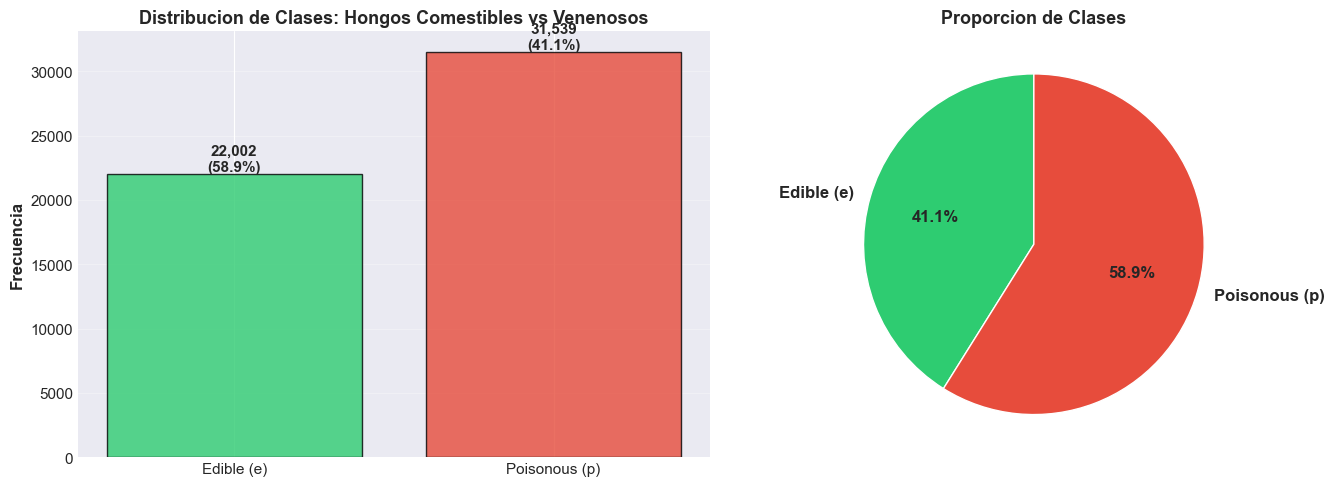


INTERPRETACION:
El dataset esta BALANCEADO (ratio 1.43:1)
Esto es ideal para modelos de clasificacion.


In [7]:
# Visualizacion de la distribucion de clases
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafico de barras
colors = ['#2ecc71', '#e74c3c']  # Verde para comestible, rojo para venenoso
class_counts_sorted = class_counts.reindex(['e', 'p'])
bars = axes[0].bar(['Edible (e)', 'Poisonous (p)'], class_counts_sorted.values, color=colors, alpha=0.8, edgecolor='black')
axes[0].set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
axes[0].set_title('Distribucion de Clases: Hongos Comestibles vs Venenosos', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}\n({class_percentages.iloc[i]:.1f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Grafico de pastel
axes[1].pie(class_counts_sorted.values, labels=['Edible (e)', 'Poisonous (p)'], 
           colors=colors, autopct='%1.1f%%', startangle=90, 
           textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Proporcion de Clases', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Interpretacion
balance_ratio = class_counts.max() / class_counts.min()
print("\n" + "="*70)
print("INTERPRETACION:")
print("="*70)
if balance_ratio < 1.5:
    print(f"El dataset esta BALANCEADO (ratio {balance_ratio:.2f}:1)")
    print("Esto es ideal para modelos de clasificacion.")
elif balance_ratio < 3:
    print(f"El dataset tiene un LIGERO DESBALANCE (ratio {balance_ratio:.2f}:1)")
    print("Podria requerir tecnicas de balanceo dependiendo del algoritmo.")
else:
    print(f"El dataset esta DESBALANCEADO (ratio {balance_ratio:.2f}:1)")
    print("Se recomienda usar tecnicas de balanceo (SMOTE, undersampling, etc.)")

## 3. Distribuciones de Variables Numericas

Analizamos las tres variables morfologicas numericas: diametro del sombrero, altura del tallo y ancho del tallo. Buscamos identificar si existen diferencias morfologicas significativas entre hongos comestibles y venenosos.

In [8]:
# Estadisticas descriptivas de variables numericas
print("ESTADISTICAS DESCRIPTIVAS - VARIABLES NUMERICAS")
print("="*70)
display(df[numerical_vars].describe())

ESTADISTICAS DESCRIPTIVAS - VARIABLES NUMERICAS


,cap-diameter,stem-height,stem-width
count,53541.000000,53541.000000,53541.000000
mean,6.200558,6.307055,11.300000
std,3.642953,2.646037,8.062959
min,0.380000,0.000000,0.000000
25%,3.530000,4.710000,5.230000
50%,5.660000,5.920000,9.900000
75%,8.180000,7.550000,15.760000
max,23.160000,17.530000,51.930000


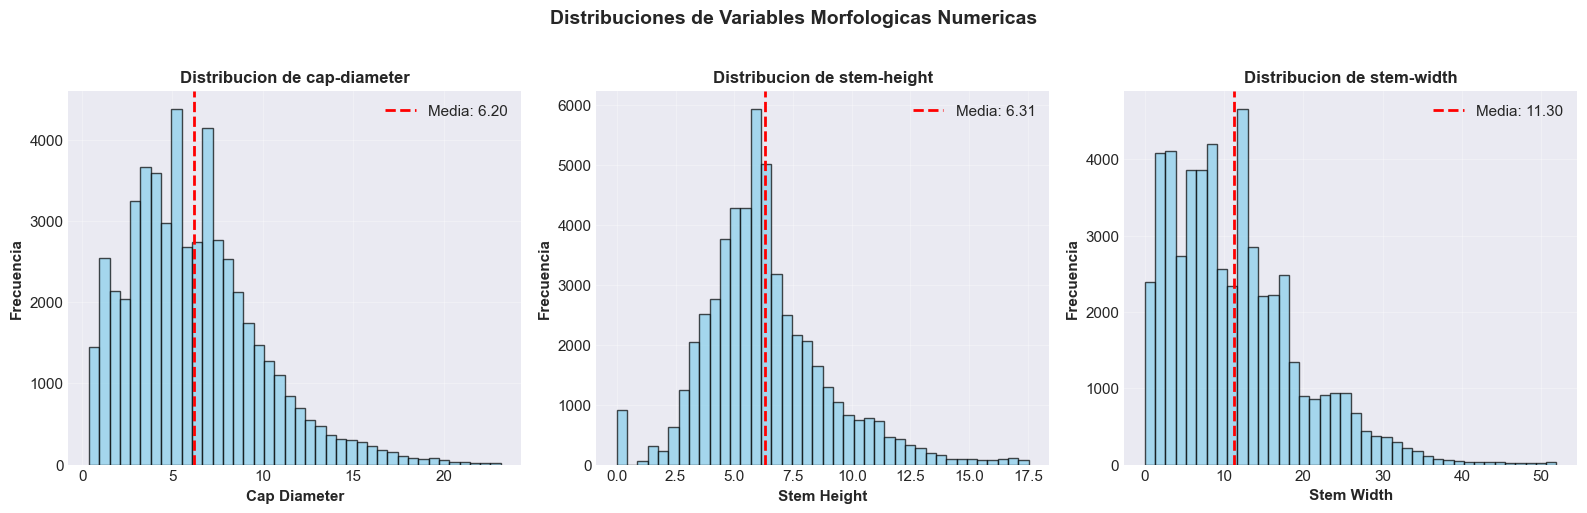

In [9]:
# Histogramas de variables numericas
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, var in enumerate(numerical_vars):
    axes[idx].hist(df[var], bins=40, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(var.replace('-', ' ').title(), fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Distribucion de {var}', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)
    
    # Agregar linea de media
    mean_val = df[var].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    axes[idx].legend()

plt.suptitle('Distribuciones de Variables Morfologicas Numericas', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

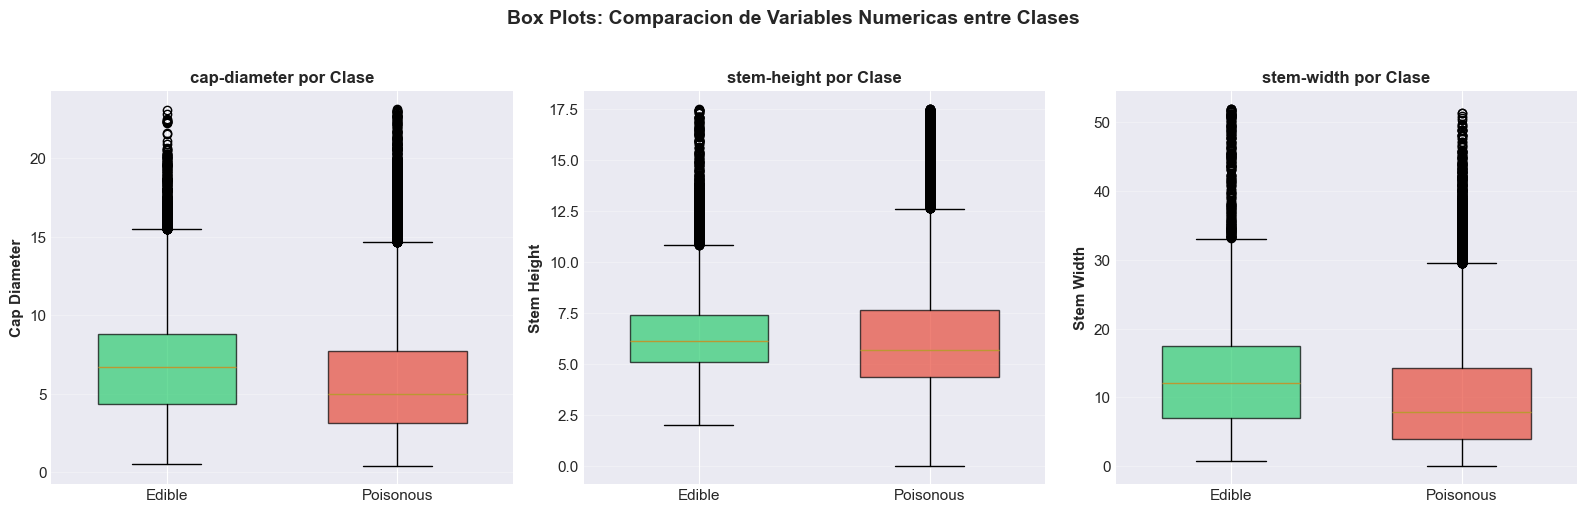

In [10]:
# Box plots por clase
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
colors_box = {'e': '#2ecc71', 'p': '#e74c3c'}

for idx, var in enumerate(numerical_vars):
    data_to_plot = [df[df['class'] == 'e'][var], df[df['class'] == 'p'][var]]
    bp = axes[idx].boxplot(data_to_plot, labels=['Edible', 'Poisonous'], 
                           patch_artist=True, widths=0.6)
    
    # Colorear las cajas
    for patch, color in zip(bp['boxes'], [colors_box['e'], colors_box['p']]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[idx].set_ylabel(var.replace('-', ' ').title(), fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{var} por Clase', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='y')

plt.suptitle('Box Plots: Comparacion de Variables Numericas entre Clases', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

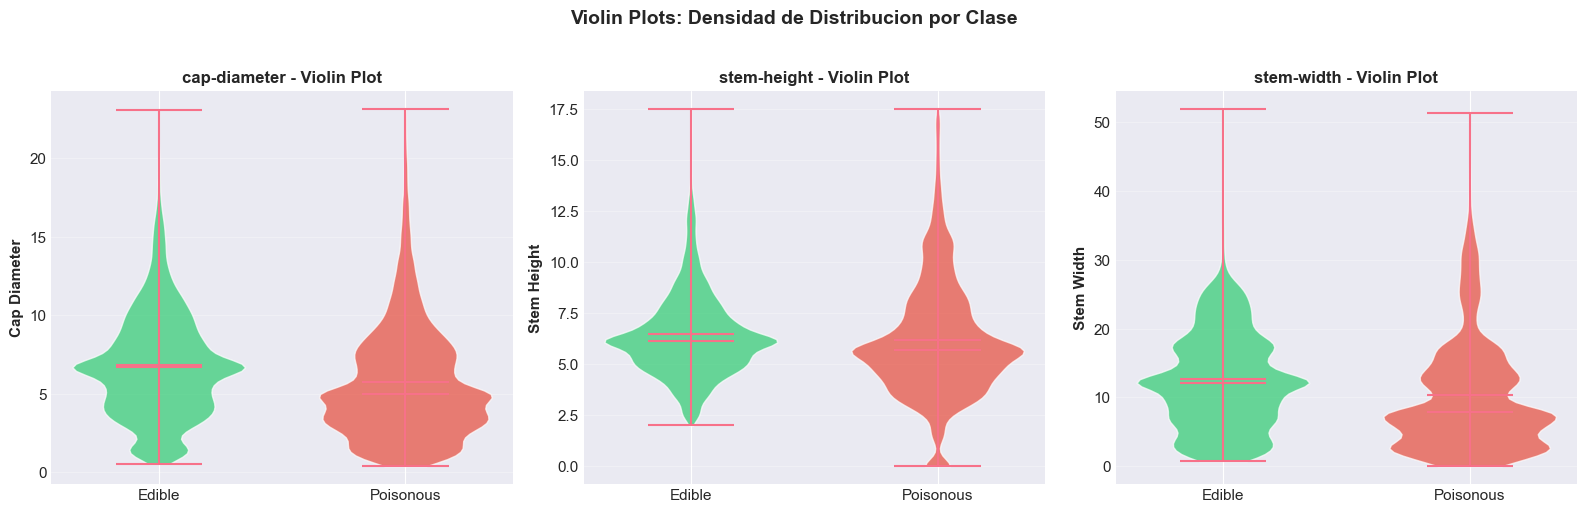

In [11]:
# Violin plots para comparar distribuciones
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, var in enumerate(numerical_vars):
    parts = axes[idx].violinplot([df[df['class'] == 'e'][var], df[df['class'] == 'p'][var]], 
                                 positions=[0, 1], widths=0.7, showmeans=True, showmedians=True)
    
    # Colorear los violines
    for i, pc in enumerate(parts['bodies']):
        color = colors_box['e'] if i == 0 else colors_box['p']
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    axes[idx].set_xticks([0, 1])
    axes[idx].set_xticklabels(['Edible', 'Poisonous'])
    axes[idx].set_ylabel(var.replace('-', ' ').title(), fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{var} - Violin Plot', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='y')

plt.suptitle('Violin Plots: Densidad de Distribucion por Clase', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [12]:
# Analisis estadistico de diferencias entre clases
print("\n" + "="*70)
print("ANALISIS DE DIFERENCIAS MORFOLOGICAS ENTRE CLASES")
print("="*70)

for var in numerical_vars:
    edible_data = df[df['class'] == 'e'][var]
    poisonous_data = df[df['class'] == 'p'][var]
    
    # Test t de Student
    t_stat, p_value = stats.ttest_ind(edible_data, poisonous_data)
    
    print(f"\n{var.upper()}:")
    print(f"  Media Edible: {edible_data.mean():.2f}")
    print(f"  Media Poisonous: {poisonous_data.mean():.2f}")
    print(f"  Diferencia: {abs(edible_data.mean() - poisonous_data.mean()):.2f}")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4e}")
    
    if p_value < 0.001:
        print(f"  Conclusion: Diferencia ALTAMENTE SIGNIFICATIVA (p < 0.001)")
    elif p_value < 0.05:
        print(f"  Conclusion: Diferencia SIGNIFICATIVA (p < 0.05)")
    else:
        print(f"  Conclusion: NO hay diferencia significativa (p >= 0.05)")


ANALISIS DE DIFERENCIAS MORFOLOGICAS ENTRE CLASES

CAP-DIAMETER:
  Media Edible: 6.85
  Media Poisonous: 5.75
  Diferencia: 1.09
  T-statistic: 34.5773
  P-value: 4.0234e-259
  Conclusion: Diferencia ALTAMENTE SIGNIFICATIVA (p < 0.001)

STEM-HEIGHT:
  Media Edible: 6.46
  Media Poisonous: 6.20
  Diferencia: 0.26
  T-statistic: 11.3343
  P-value: 9.5916e-30
  Conclusion: Diferencia ALTAMENTE SIGNIFICATIVA (p < 0.001)

STEM-WIDTH:
  Media Edible: 12.71
  Media Poisonous: 10.32
  Diferencia: 2.40
  T-statistic: 34.2069
  P-value: 1.0530e-253
  Conclusion: Diferencia ALTAMENTE SIGNIFICATIVA (p < 0.001)


## 4. Variables Categoricas Clave

Analizamos las variables categoricas mas relevantes para identificar patrones en su relacion con la toxicidad de los hongos.

In [13]:
# Seleccionar variables categoricas clave para analisis
key_categorical = ['cap-shape', 'cap-color', 'habitat', 'season', 'ring-type', 'gill-color']

print("VARIABLES CATEGORICAS CLAVE SELECCIONADAS:")
print("="*70)
for var in key_categorical:
    n_unique = df[var].nunique()
    print(f"  {var}: {n_unique} categorias unicas")

VARIABLES CATEGORICAS CLAVE SELECCIONADAS:
  cap-shape: 7 categorias unicas
  cap-color: 12 categorias unicas
  habitat: 8 categorias unicas
  season: 4 categorias unicas
  ring-type: 8 categorias unicas
  gill-color: 12 categorias unicas


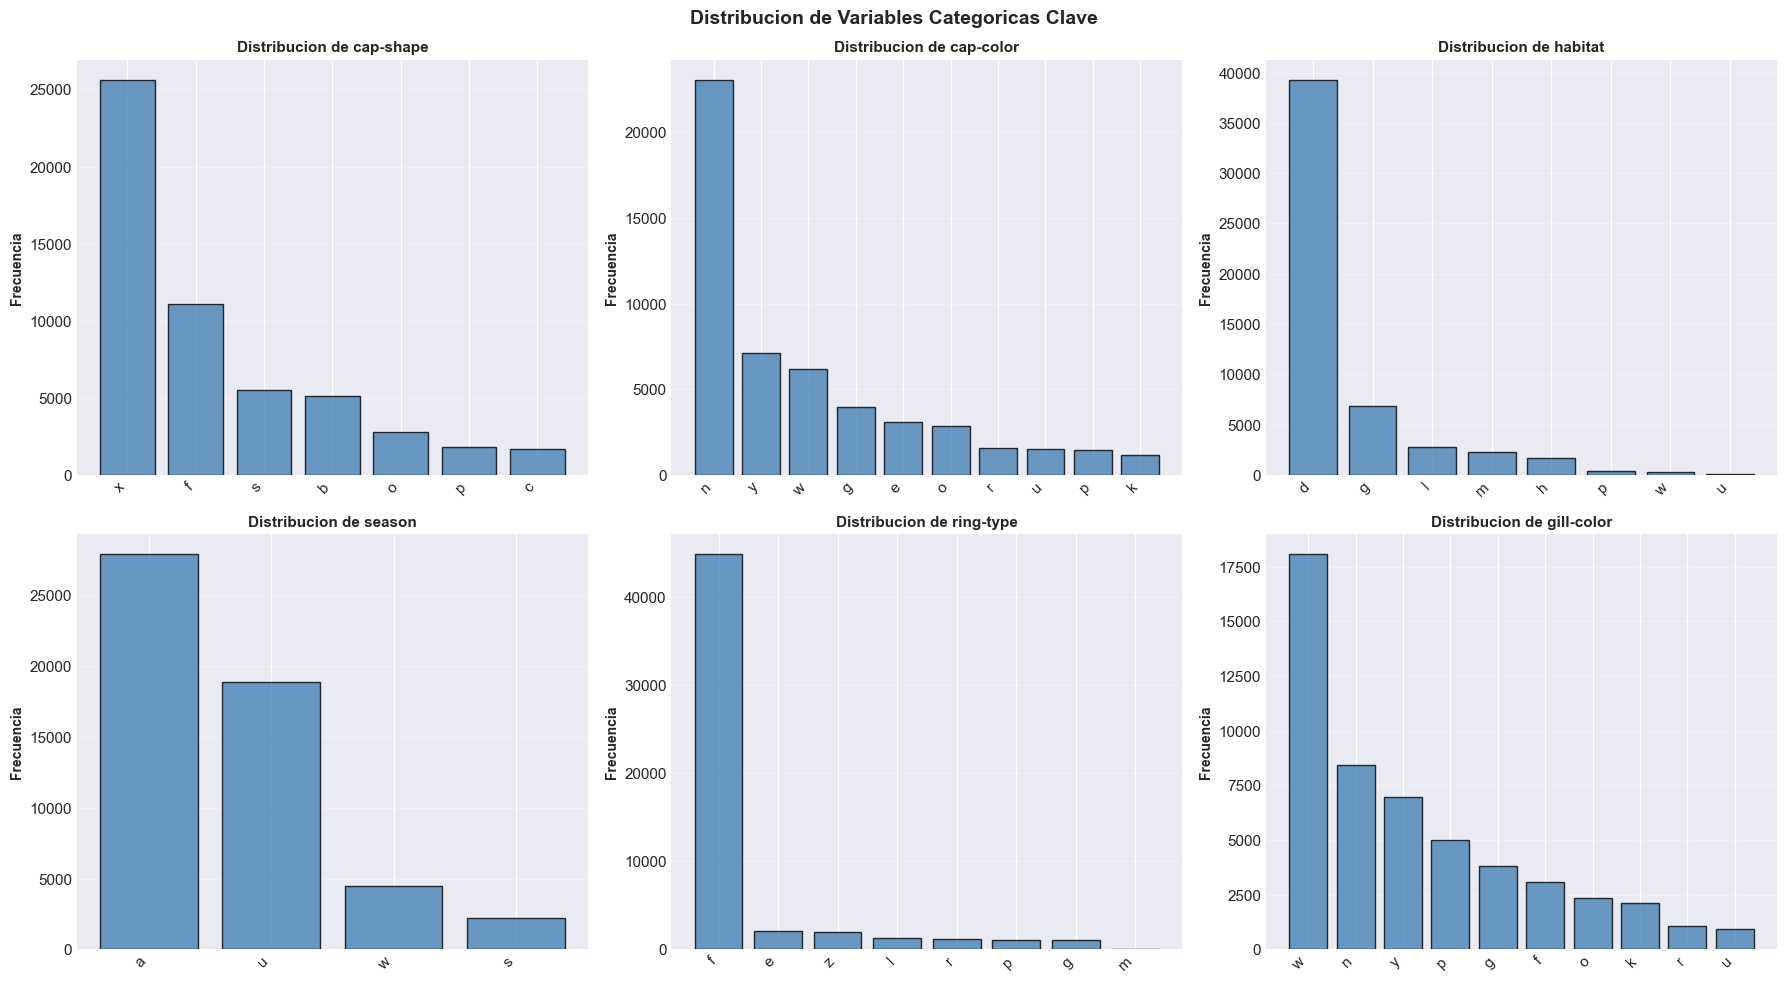

In [14]:
# Graficos de barras para variables categoricas clave
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, var in enumerate(key_categorical):
    value_counts = df[var].value_counts().head(10)  # Top 10 categorias
    axes[idx].bar(range(len(value_counts)), value_counts.values, color='steelblue', alpha=0.8, edgecolor='black')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
    axes[idx].set_title(f'Distribucion de {var}', fontsize=11, fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='y')

plt.suptitle('Distribucion de Variables Categoricas Clave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

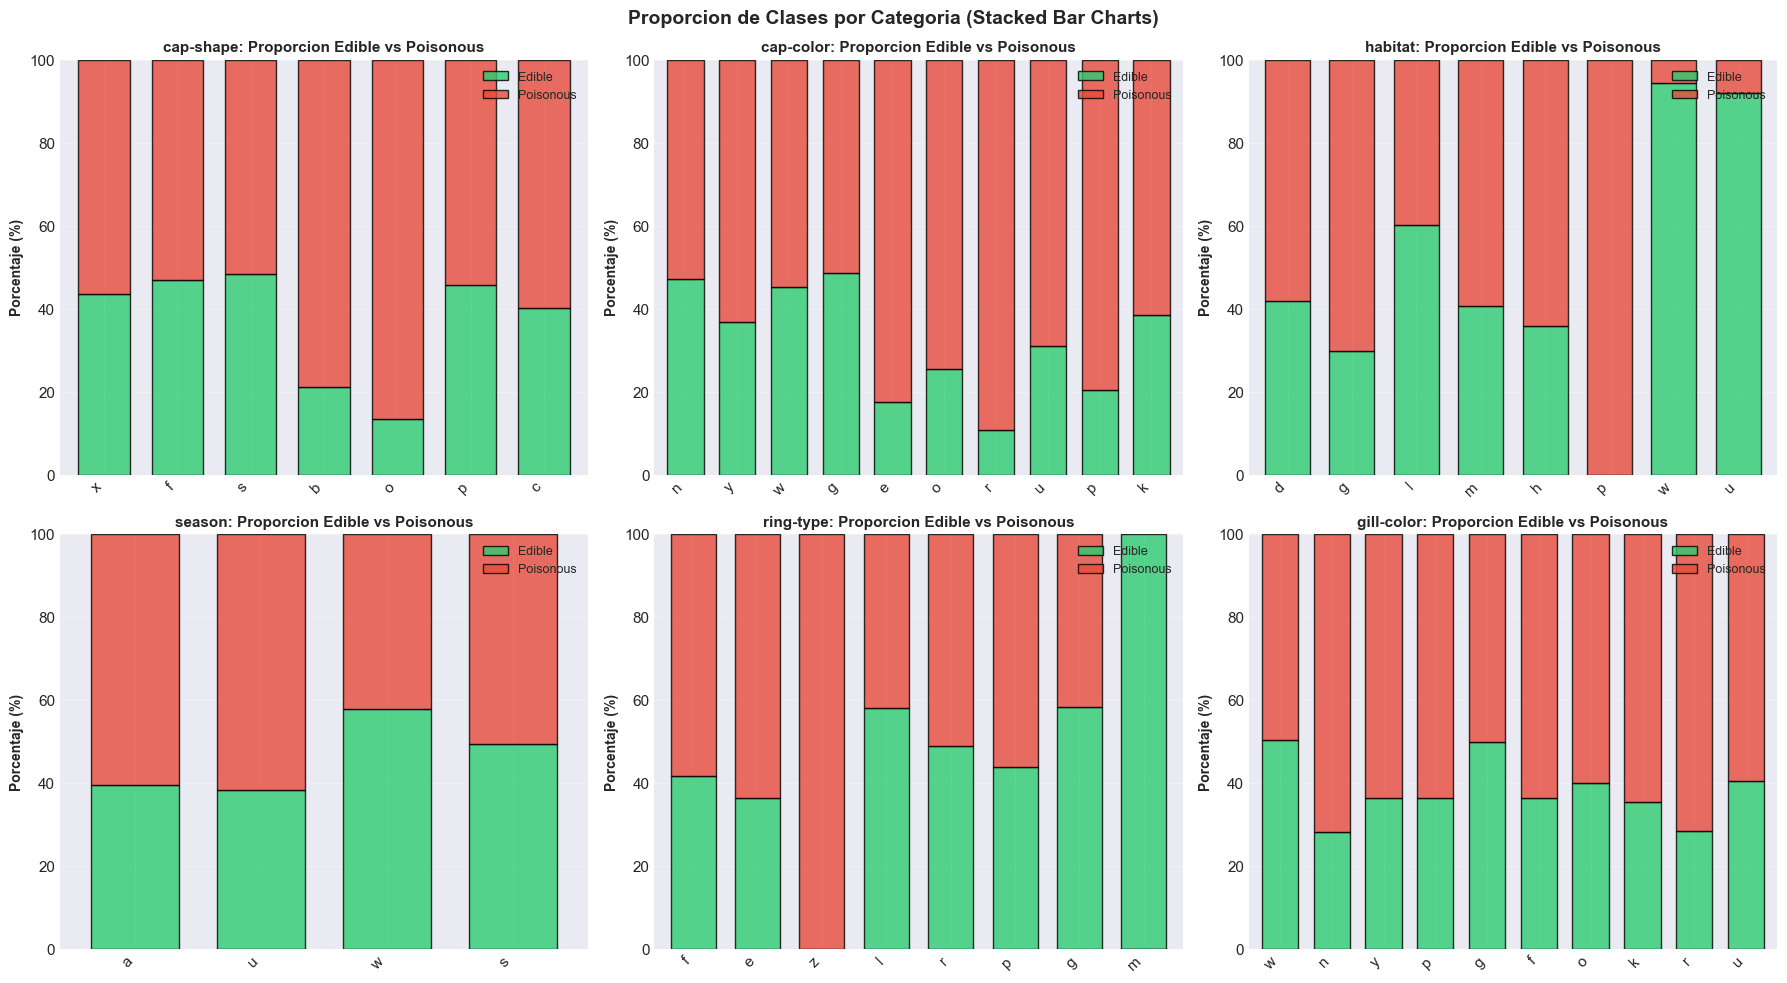

In [15]:
# Graficos apilados (stacked bar charts) para ver proporcion de e/p por categoria
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, var in enumerate(key_categorical):
    # Crear tabla de contingencia
    ct = pd.crosstab(df[var], df['class'], normalize='index') * 100
    
    # Obtener solo las top 10 categorias por frecuencia
    top_categories = df[var].value_counts().head(10).index
    ct_top = ct.loc[top_categories]
    
    # Grafico apilado
    ct_top.plot(kind='bar', stacked=True, ax=axes[idx], 
                color=[colors_box['e'], colors_box['p']], 
                alpha=0.8, edgecolor='black', width=0.7)
    
    axes[idx].set_ylabel('Porcentaje (%)', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_title(f'{var}: Proporcion Edible vs Poisonous', fontsize=11, fontweight='bold')
    axes[idx].legend(['Edible', 'Poisonous'], loc='upper right', fontsize=9)
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    axes[idx].grid(alpha=0.3, axis='y')
    axes[idx].set_ylim(0, 100)

plt.suptitle('Proporcion de Clases por Categoria (Stacked Bar Charts)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [16]:
# Identificar categorias mas asociadas con hongos venenosos
print("\n" + "="*70)
print("CATEGORIAS MAS ASOCIADAS CON HONGOS VENENOSOS (> 70% poisonous)")
print("="*70)

for var in key_categorical:
    ct = pd.crosstab(df[var], df['class'], normalize='index') * 100
    high_poison = ct[ct['p'] > 70].sort_values('p', ascending=False)
    
    if len(high_poison) > 0:
        print(f"\n{var.upper()}:")
        for cat, row in high_poison.iterrows():
            print(f"  {cat}: {row['p']:.1f}% venenosos (n={len(df[df[var]==cat])})")  
    else:
        print(f"\n{var.upper()}: Ninguna categoria supera el 70% de venenosos")


CATEGORIAS MAS ASOCIADAS CON HONGOS VENENOSOS (> 70% poisonous)

CAP-SHAPE:
  o: 86.6% venenosos (n=2776)
  b: 78.8% venenosos (n=5084)

CAP-COLOR:
  r: 89.3% venenosos (n=1584)
  e: 82.4% venenosos (n=3054)
  p: 79.6% venenosos (n=1428)
  o: 74.5% venenosos (n=2836)

HABITAT:
  p: 100.0% venenosos (n=338)
  g: 70.2% venenosos (n=6803)

SEASON: Ninguna categoria supera el 70% de venenosos

RING-TYPE:
  z: 100.0% venenosos (n=1939)

GILL-COLOR:
  e: 82.4% venenosos (n=871)
  n: 71.7% venenosos (n=8422)
  r: 71.4% venenosos (n=1083)


In [17]:
# Identificar categorias mas asociadas con hongos comestibles
print("\n" + "="*70)
print("CATEGORIAS MAS ASOCIADAS CON HONGOS COMESTIBLES (> 70% edible)")
print("="*70)

for var in key_categorical:
    ct = pd.crosstab(df[var], df['class'], normalize='index') * 100
    high_edible = ct[ct['e'] > 70].sort_values('e', ascending=False)
    
    if len(high_edible) > 0:
        print(f"\n{var.upper()}:")
        for cat, row in high_edible.iterrows():
            print(f"  {cat}: {row['e']:.1f}% comestibles (n={len(df[df[var]==cat])})")
    else:
        print(f"\n{var.upper()}: Ninguna categoria supera el 70% de comestibles")


CATEGORIAS MAS ASOCIADAS CON HONGOS COMESTIBLES (> 70% edible)

CAP-SHAPE: Ninguna categoria supera el 70% de comestibles

CAP-COLOR:
  b: 83.3% comestibles (n=914)

HABITAT:
  w: 94.4% comestibles (n=324)
  u: 92.0% comestibles (n=50)

SEASON: Ninguna categoria supera el 70% de comestibles

RING-TYPE:
  m: 100.0% comestibles (n=16)

GILL-COLOR: Ninguna categoria supera el 70% de comestibles


## 5. Analisis de Correlacion

Calculamos correlaciones entre variables para identificar relaciones lineales. Para esto, codificaremos las variables categoricas numericamente y la variable objetivo (e=0, p=1).

In [18]:
# Crear un dataframe codificado numericamente para analisis de correlacion
df_encoded = df.copy()

# Codificar variable objetivo
df_encoded['class_encoded'] = df_encoded['class'].map({'e': 0, 'p': 1})

# Codificar variables categoricas usando Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_vars:
    df_encoded[f'{col}_encoded'] = le.fit_transform(df_encoded[col].astype(str))

# Seleccionar solo columnas numericas y codificadas para correlacion
correlation_cols = numerical_vars + [f'{col}_encoded' for col in categorical_vars] + ['class_encoded']
df_corr = df_encoded[correlation_cols]

print("Dataset codificado para analisis de correlacion")
print(f"Dimensiones: {df_corr.shape}")

Dataset codificado para analisis de correlacion
Dimensiones: (53541, 17)


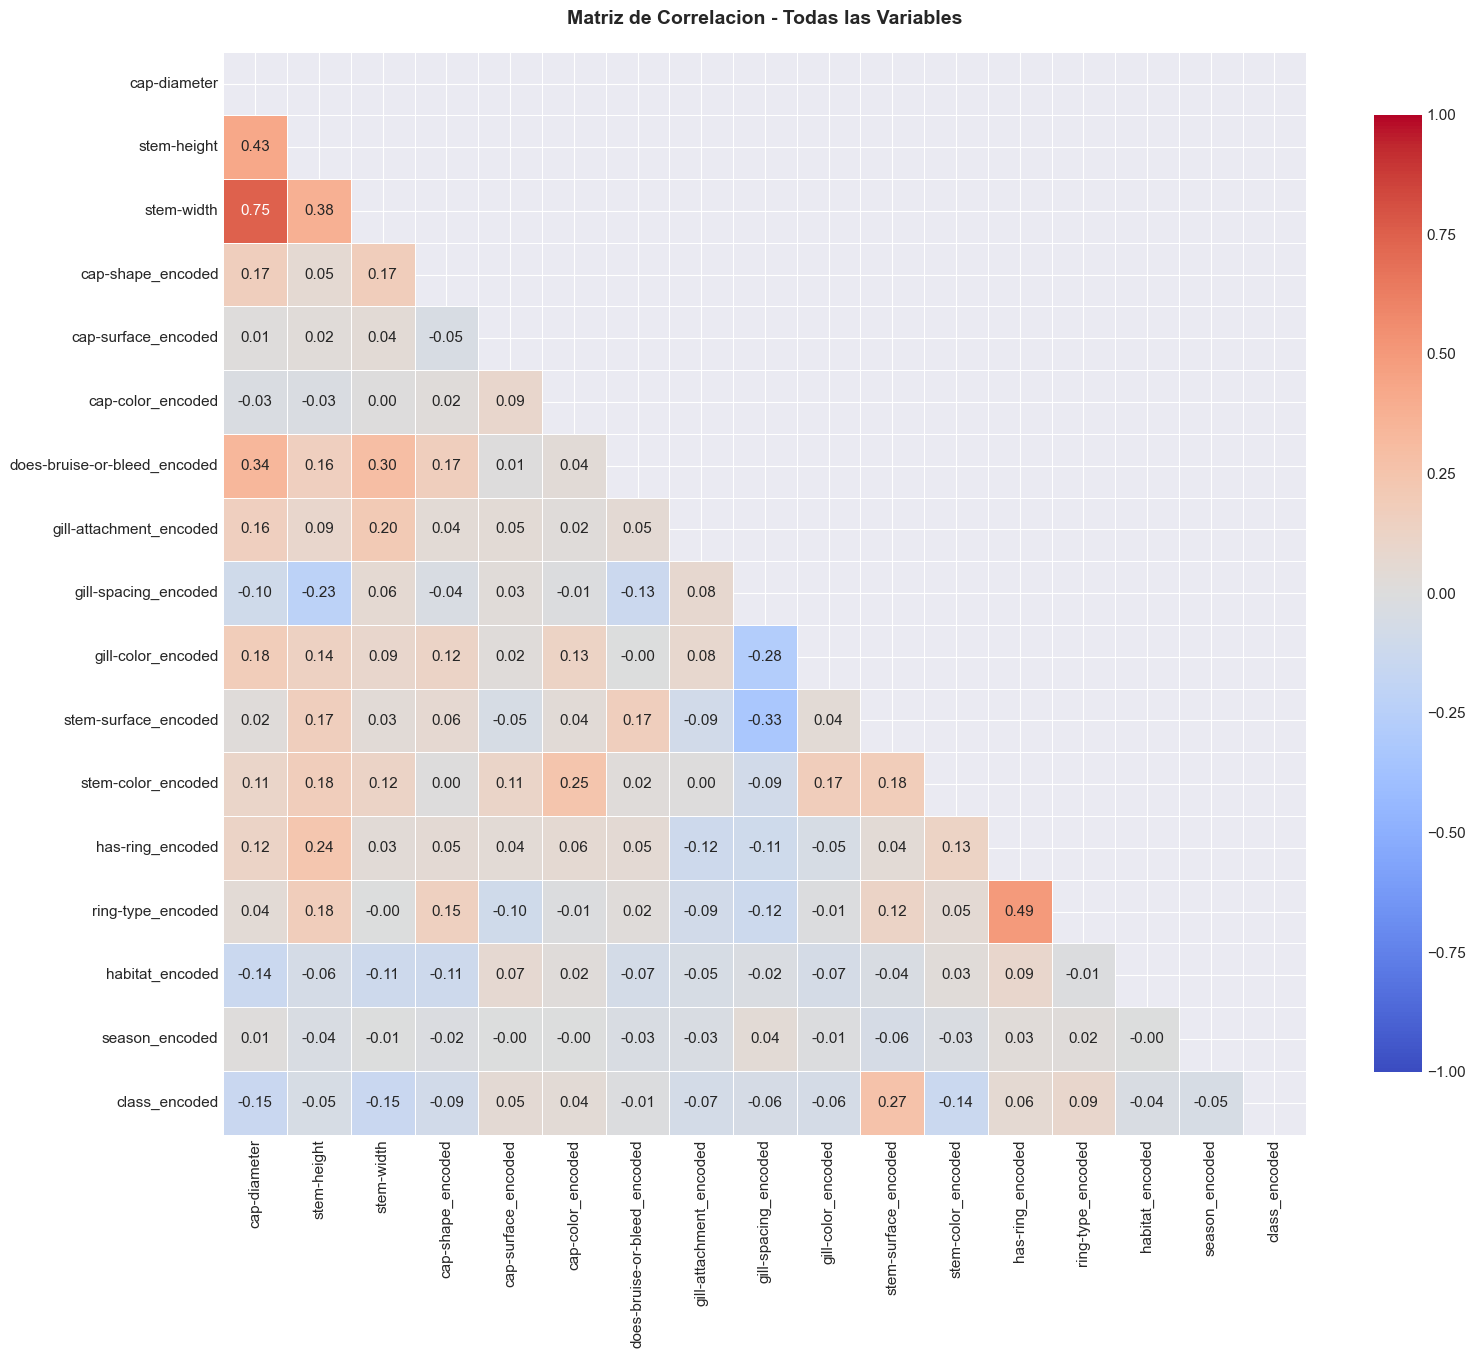

In [19]:
# Matriz de correlacion completa
correlation_matrix = df_corr.corr()

# Heatmap de correlacion
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mascara para triangulo superior
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, 
            cbar_kws={"shrink": 0.8}, mask=mask, vmin=-1, vmax=1)

plt.title('Matriz de Correlacion - Todas las Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [20]:
# Correlaciones con la variable objetivo (class)
class_correlations = correlation_matrix['class_encoded'].drop('class_encoded').sort_values(ascending=False, key=abs)

print("\n" + "="*70)
print("CORRELACIONES CON LA VARIABLE OBJETIVO (class)")
print("="*70)
print("\nTop 15 variables mas correlacionadas (valor absoluto):")
print()

for idx, (var, corr) in enumerate(class_correlations.head(15).items(), 1):
    var_clean = var.replace('_encoded', '')
    direction = "POSITIVA" if corr > 0 else "NEGATIVA"
    strength = "FUERTE" if abs(corr) > 0.5 else "MODERADA" if abs(corr) > 0.3 else "DEBIL"
    print(f"{idx:2d}. {var_clean:25s}: {corr:6.3f}  ({strength} {direction})")


CORRELACIONES CON LA VARIABLE OBJETIVO (class)

Top 15 variables mas correlacionadas (valor absoluto):

 1. stem-surface             :  0.265  (DEBIL POSITIVA)
 2. cap-diameter             : -0.148  (DEBIL NEGATIVA)
 3. stem-width               : -0.146  (DEBIL NEGATIVA)
 4. stem-color               : -0.136  (DEBIL NEGATIVA)
 5. cap-shape                : -0.093  (DEBIL NEGATIVA)
 6. ring-type                :  0.088  (DEBIL POSITIVA)
 7. gill-attachment          : -0.071  (DEBIL NEGATIVA)
 8. gill-color               : -0.065  (DEBIL NEGATIVA)
 9. gill-spacing             : -0.058  (DEBIL NEGATIVA)
10. has-ring                 :  0.056  (DEBIL POSITIVA)
11. cap-surface              :  0.051  (DEBIL POSITIVA)
12. stem-height              : -0.049  (DEBIL NEGATIVA)
13. season                   : -0.048  (DEBIL NEGATIVA)
14. cap-color                :  0.045  (DEBIL POSITIVA)
15. habitat                  : -0.038  (DEBIL NEGATIVA)


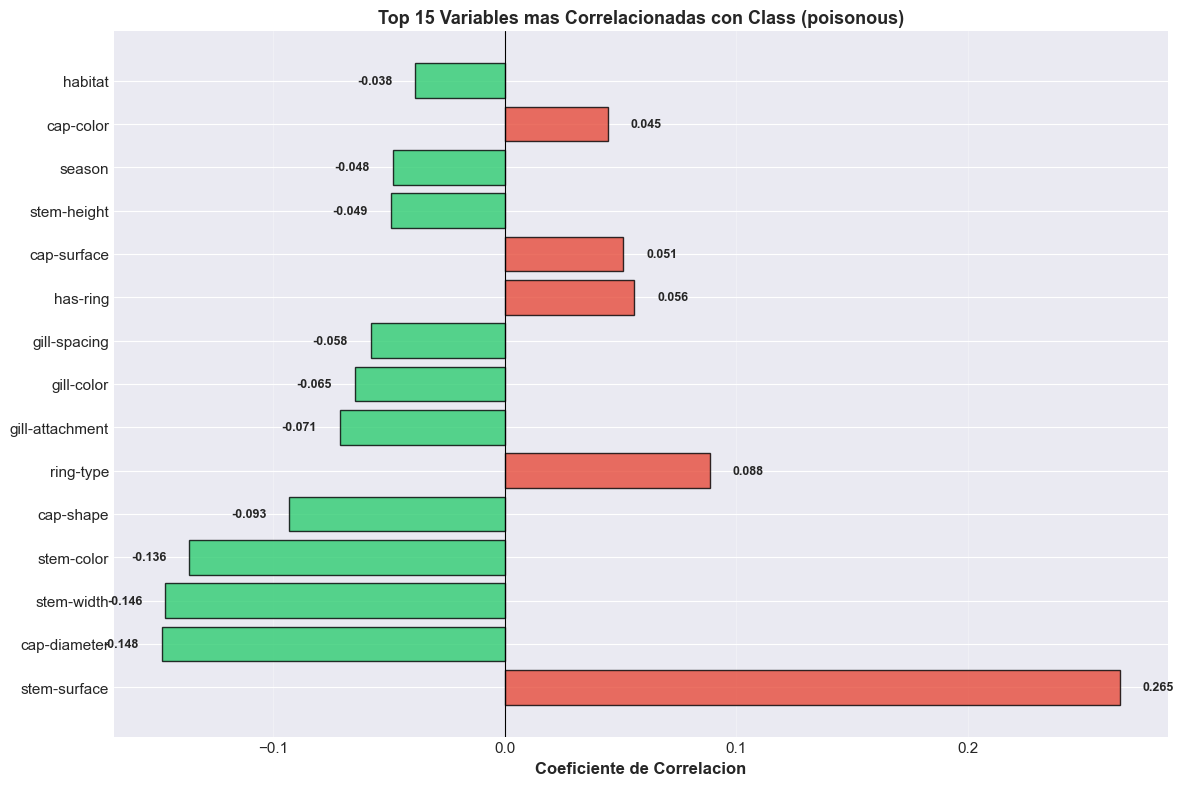

In [21]:
# Grafico de barras de correlaciones con la variable objetivo
top_n = 15
top_correlations = class_correlations.head(top_n)

plt.figure(figsize=(12, 8))
colors_corr = ['#e74c3c' if x > 0 else '#2ecc71' for x in top_correlations.values]
bars = plt.barh(range(len(top_correlations)), top_correlations.values, color=colors_corr, alpha=0.8, edgecolor='black')
plt.yticks(range(len(top_correlations)), [x.replace('_encoded', '') for x in top_correlations.index])
plt.xlabel('Coeficiente de Correlacion', fontsize=12, fontweight='bold')
plt.title(f'Top {top_n} Variables mas Correlacionadas con Class (poisonous)', fontsize=13, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(alpha=0.3, axis='x')

# Agregar valores en las barras
for i, (bar, val) in enumerate(zip(bars, top_correlations.values)):
    plt.text(val + 0.01 if val > 0 else val - 0.01, i, f'{val:.3f}', 
             va='center', ha='left' if val > 0 else 'right', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

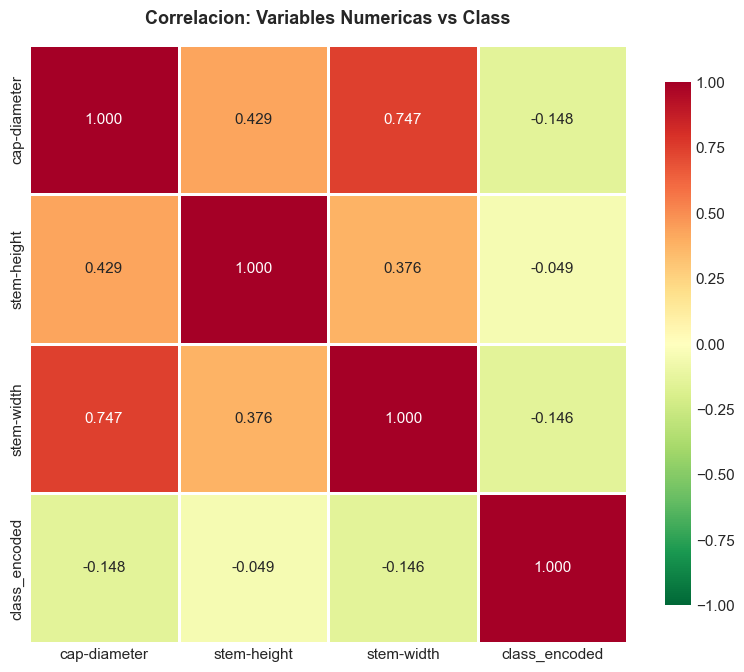

In [22]:
# Heatmap enfocado: correlaciones entre variables numericas y la clase
selected_vars = numerical_vars + ['class_encoded']
corr_subset = df_corr[selected_vars].corr()

plt.figure(figsize=(8, 7))
sns.heatmap(corr_subset, annot=True, fmt='.3f', cmap='RdYlGn_r', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlacion: Variables Numericas vs Class', fontsize=13, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

In [23]:
# Identificar pares de variables altamente correlacionadas (multicolinealidad)
print("\n" + "="*70)
print("MULTICOLINEALIDAD: Pares de Variables Altamente Correlacionadas (|r| > 0.7)")
print("="*70)

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            var1 = correlation_matrix.columns[i].replace('_encoded', '')
            var2 = correlation_matrix.columns[j].replace('_encoded', '')
            corr_val = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((var1, var2, corr_val))

if high_corr_pairs:
    high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    for var1, var2, corr in high_corr_pairs[:10]:  # Top 10
        print(f"  {var1} <-> {var2}: {corr:.3f}")
else:
    print("  No se encontraron pares con correlacion > 0.7")


MULTICOLINEALIDAD: Pares de Variables Altamente Correlacionadas (|r| > 0.7)
  cap-diameter <-> stem-width: 0.747


## 6. Analisis Multivariado

Exploramos relaciones entre multiples variables simultaneamente mediante pair plots y scatter plots 2D.

Creando pair plot con muestra de 5000 observaciones...


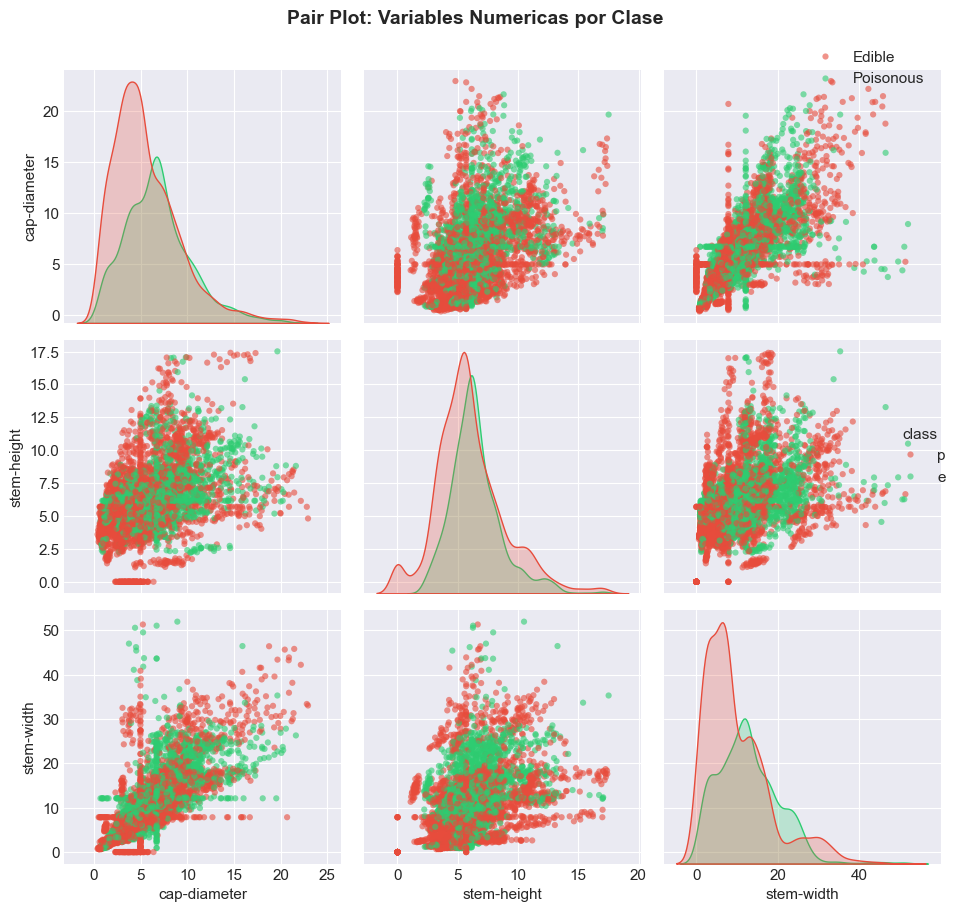

Pair plot completado.


In [24]:
# Pair plot de variables numericas coloreado por clase
# Usar una muestra para mejor rendimiento
sample_size = min(5000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

print(f"Creando pair plot con muestra de {sample_size} observaciones...")

pairplot = sns.pairplot(df_sample, vars=numerical_vars, hue='class', 
                        palette={'e': '#2ecc71', 'p': '#e74c3c'},
                        plot_kws={'alpha': 0.6, 's': 20, 'edgecolor': 'none'},
                        diag_kind='kde', corner=False, height=3)

pairplot.fig.suptitle('Pair Plot: Variables Numericas por Clase', 
                      fontsize=14, fontweight='bold', y=1.01)

# Ajustar la leyenda
handles = pairplot._legend_data.values()
labels = ['Edible', 'Poisonous']
pairplot.fig.legend(handles=handles, labels=labels, loc='upper right', 
                   bbox_to_anchor=(0.98, 0.98), fontsize=11)

plt.tight_layout()
plt.show()

print("Pair plot completado.")

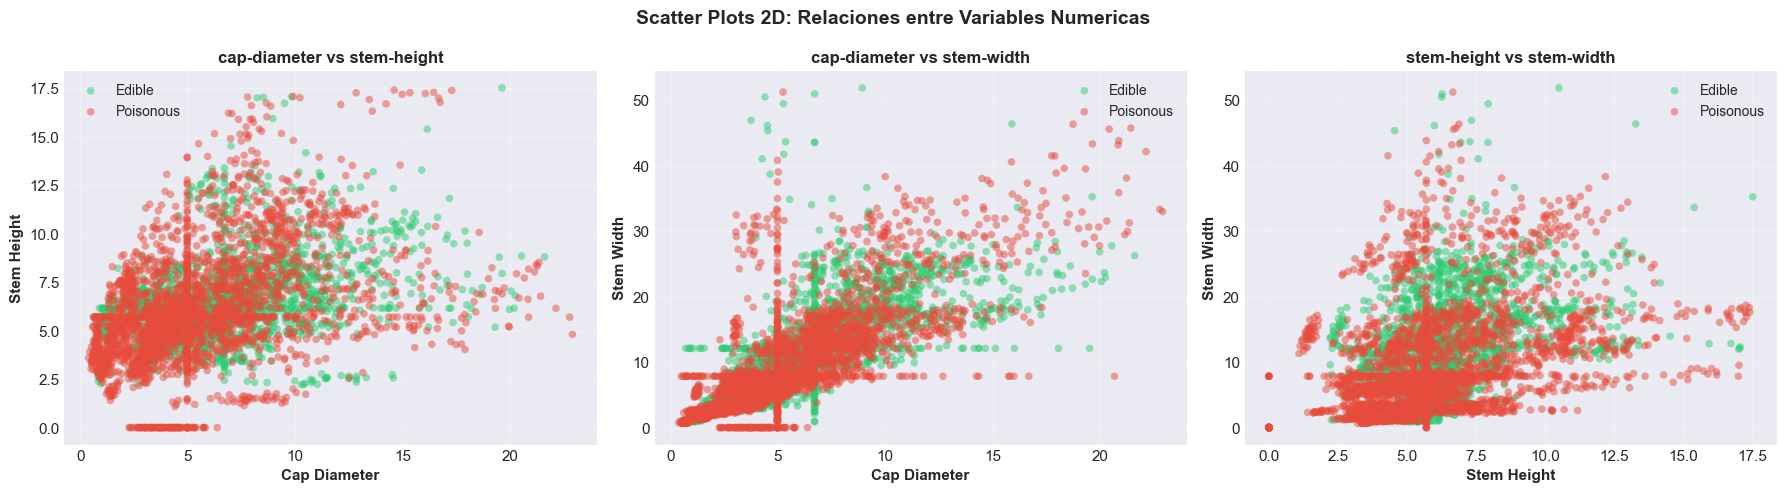

In [25]:
# Scatter plots 2D de combinaciones interesantes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

combinations = [
    ('cap-diameter', 'stem-height'),
    ('cap-diameter', 'stem-width'),
    ('stem-height', 'stem-width')
]

for idx, (var1, var2) in enumerate(combinations):
    # Separar por clase
    edible = df_sample[df_sample['class'] == 'e']
    poisonous = df_sample[df_sample['class'] == 'p']
    
    axes[idx].scatter(edible[var1], edible[var2], c='#2ecc71', 
                     alpha=0.5, s=30, edgecolor='none', label='Edible')
    axes[idx].scatter(poisonous[var1], poisonous[var2], c='#e74c3c', 
                     alpha=0.5, s=30, edgecolor='none', label='Poisonous')
    
    axes[idx].set_xlabel(var1.replace('-', ' ').title(), fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(var2.replace('-', ' ').title(), fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{var1} vs {var2}', fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=10)
    axes[idx].grid(alpha=0.3)

plt.suptitle('Scatter Plots 2D: Relaciones entre Variables Numericas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

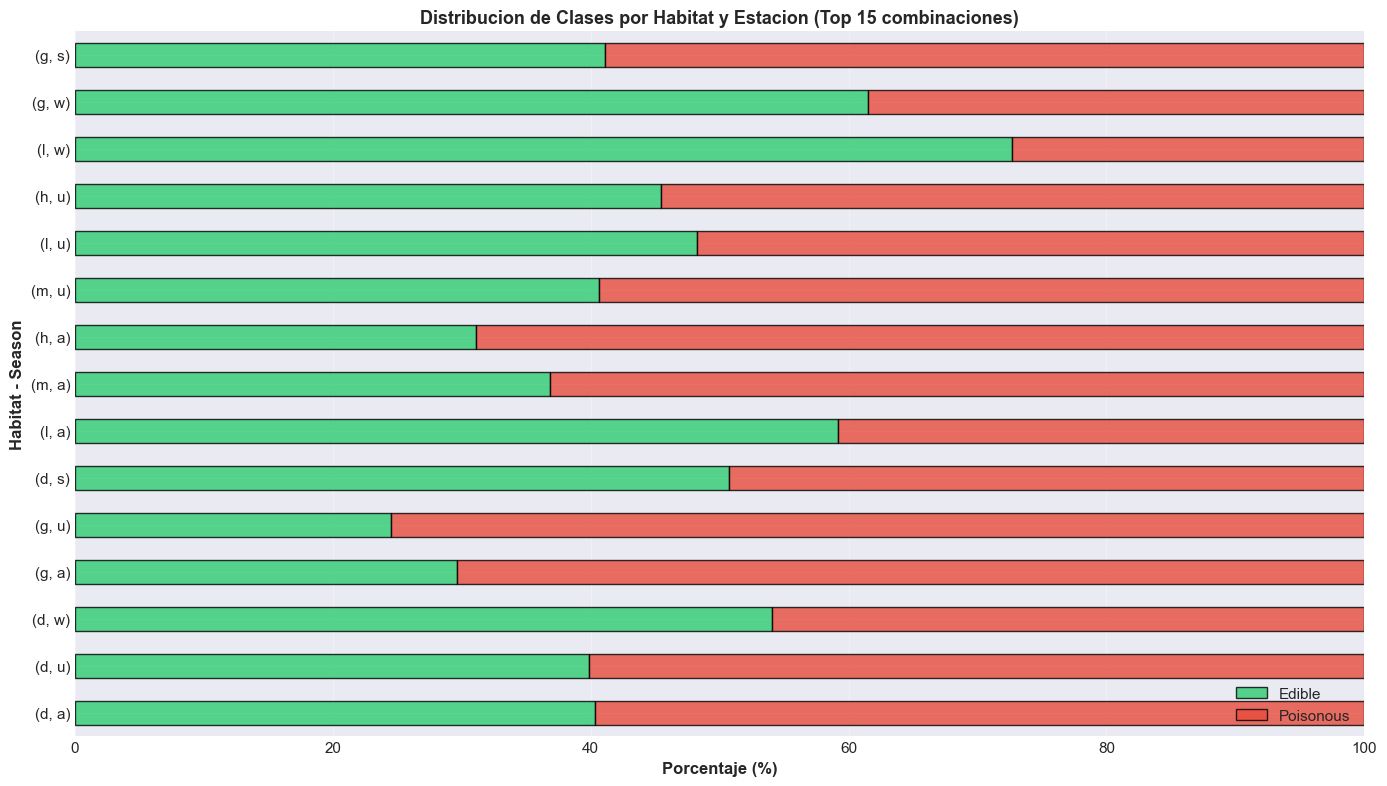

In [26]:
# Analisis multivariado: 2 variables categoricas vs clase
# Ejemplo: habitat + season vs class

ct_multi = pd.crosstab([df['habitat'], df['season']], df['class'])
ct_multi_pct = pd.crosstab([df['habitat'], df['season']], df['class'], normalize='index') * 100

# Seleccionar las 15 combinaciones mas frecuentes
top_combinations = ct_multi.sum(axis=1).nlargest(15).index
ct_multi_top = ct_multi_pct.loc[top_combinations]

fig, ax = plt.subplots(figsize=(14, 8))
ct_multi_top.plot(kind='barh', stacked=True, ax=ax,
                  color=[colors_box['e'], colors_box['p']],
                  alpha=0.8, edgecolor='black')

ax.set_xlabel('Porcentaje (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Habitat - Season', fontsize=12, fontweight='bold')
ax.set_title('Distribucion de Clases por Habitat y Estacion (Top 15 combinaciones)', 
             fontsize=13, fontweight='bold')
ax.legend(['Edible', 'Poisonous'], loc='lower right', fontsize=11)
ax.set_xlim(0, 100)
ax.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

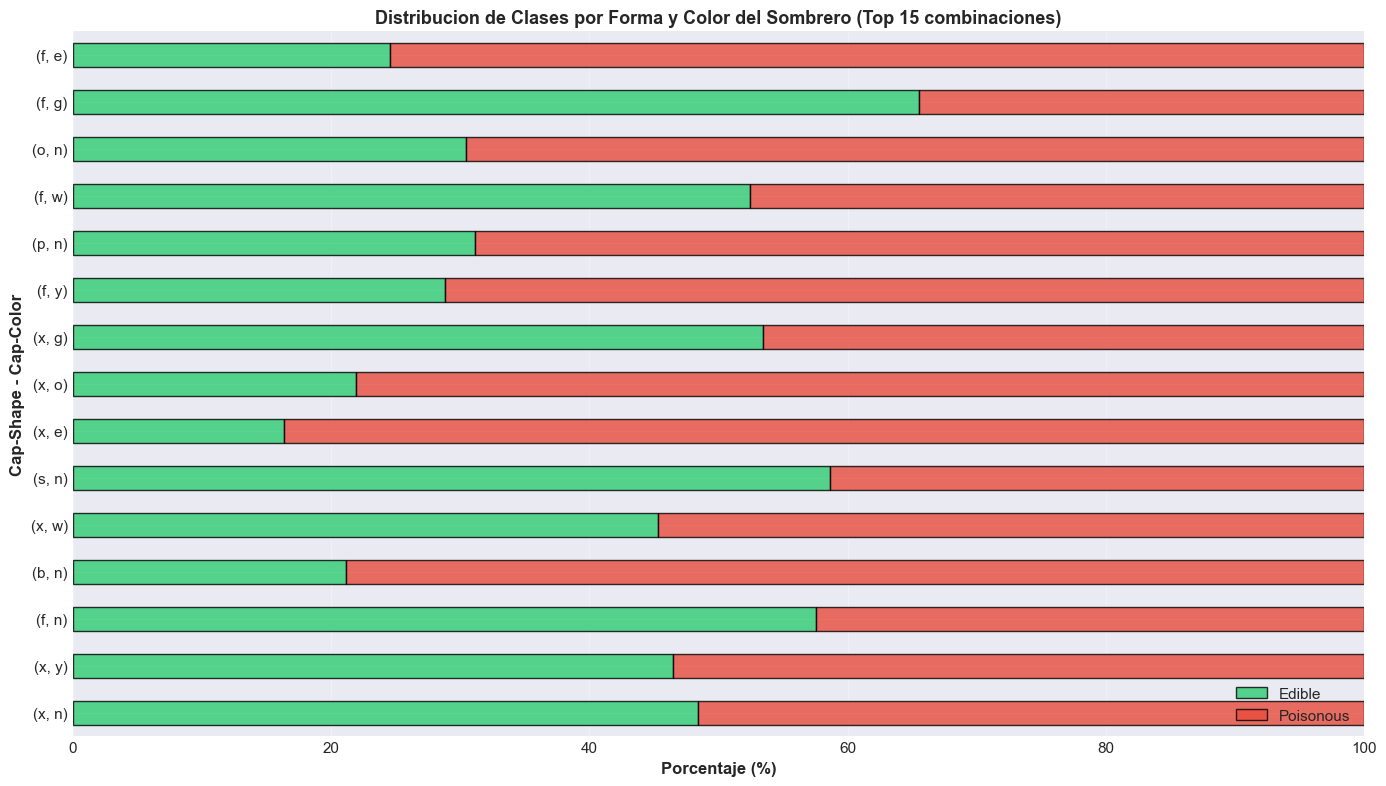

In [27]:
# Analisis: cap-shape + cap-color vs class
ct_cap = pd.crosstab([df['cap-shape'], df['cap-color']], df['class'])
ct_cap_pct = pd.crosstab([df['cap-shape'], df['cap-color']], df['class'], normalize='index') * 100

# Seleccionar las 15 combinaciones mas frecuentes
top_cap_combinations = ct_cap.sum(axis=1).nlargest(15).index
ct_cap_top = ct_cap_pct.loc[top_cap_combinations]

fig, ax = plt.subplots(figsize=(14, 8))
ct_cap_top.plot(kind='barh', stacked=True, ax=ax,
                color=[colors_box['e'], colors_box['p']],
                alpha=0.8, edgecolor='black')

ax.set_xlabel('Porcentaje (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Cap-Shape - Cap-Color', fontsize=12, fontweight='bold')
ax.set_title('Distribucion de Clases por Forma y Color del Sombrero (Top 15 combinaciones)', 
             fontsize=13, fontweight='bold')
ax.legend(['Edible', 'Poisonous'], loc='lower right', fontsize=11)
ax.set_xlim(0, 100)
ax.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## 7. Patrones por Habitat y Estacion

Analizamos como varia la proporcion de hongos comestibles vs venenosos segun el habitat donde crecen y la estacion del año.

In [28]:
# Analisis por Habitat
habitat_class = pd.crosstab(df['habitat'], df['class'])
habitat_class_pct = pd.crosstab(df['habitat'], df['class'], normalize='index') * 100

print("ANALISIS POR HABITAT")
print("="*70)
print("\nConteos absolutos:")
display(habitat_class.sort_values('p', ascending=False))
print("\nPorcentajes:")
display(habitat_class_pct.sort_values('p', ascending=False))

ANALISIS POR HABITAT

Conteos absolutos:


class,e,p
habitat,,
d,16434,22865
g,2028,4775
m,944,1371
h,604,1085
l,1640,1083
p,0,338
w,306,18
u,46,4



Porcentajes:


class,e,p
habitat,,
p,0.000000,100.000000
g,29.810378,70.189622
h,35.760805,64.239195
m,40.777538,59.222462
d,41.817858,58.182142
l,60.227690,39.772310
u,92.000000,8.000000
w,94.444444,5.555556


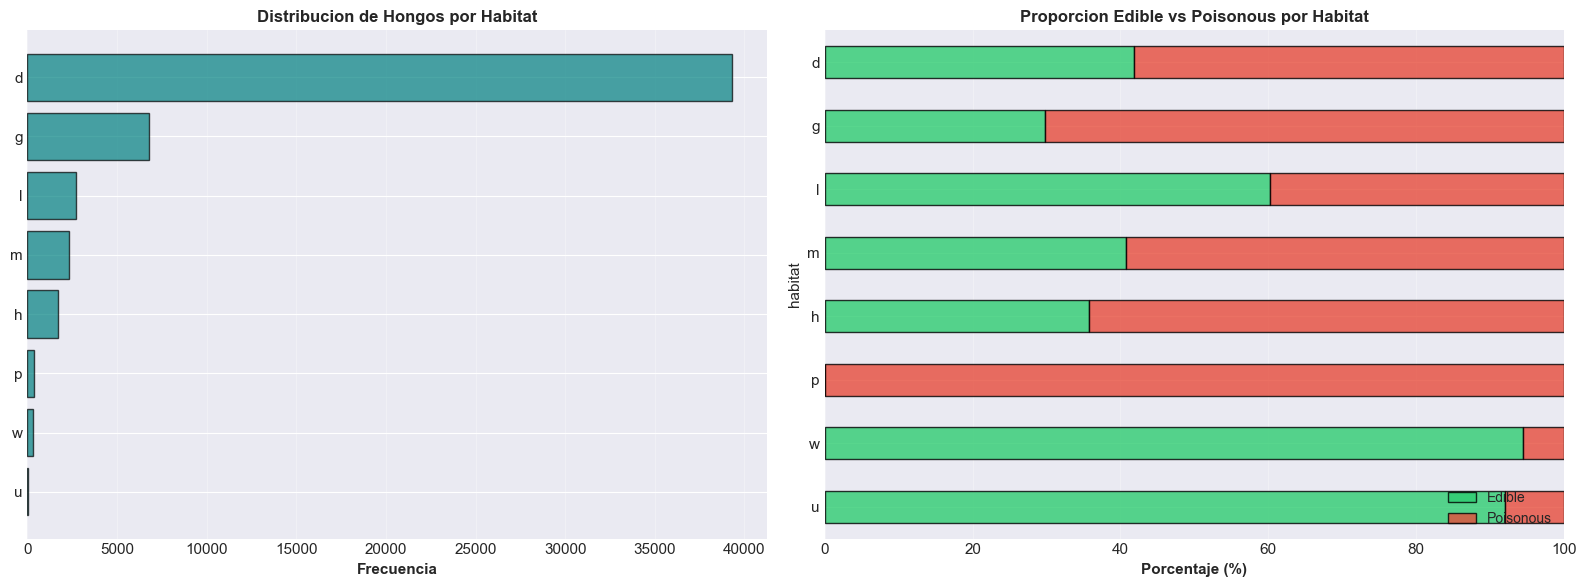

In [29]:
# Visualizacion de habitat
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Grafico 1: Conteos totales por habitat
habitat_totals = df['habitat'].value_counts().sort_values(ascending=True)
axes[0].barh(range(len(habitat_totals)), habitat_totals.values, 
             color='teal', alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(habitat_totals)))
axes[0].set_yticklabels(habitat_totals.index)
axes[0].set_xlabel('Frecuencia', fontsize=11, fontweight='bold')
axes[0].set_title('Distribucion de Hongos por Habitat', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3, axis='x')

# Grafico 2: Proporcion de clases por habitat
habitat_class_pct_sorted = habitat_class_pct.loc[habitat_totals.index]
habitat_class_pct_sorted.plot(kind='barh', stacked=True, ax=axes[1],
                              color=[colors_box['e'], colors_box['p']],
                              alpha=0.8, edgecolor='black')
axes[1].set_xlabel('Porcentaje (%)', fontsize=11, fontweight='bold')
axes[1].set_title('Proporcion Edible vs Poisonous por Habitat', fontsize=12, fontweight='bold')
axes[1].legend(['Edible', 'Poisonous'], loc='lower right', fontsize=10)
axes[1].set_xlim(0, 100)
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [30]:
# Analisis por Estacion (Season)
season_class = pd.crosstab(df['season'], df['class'])
season_class_pct = pd.crosstab(df['season'], df['class'], normalize='index') * 100

print("\n" + "="*70)
print("ANALISIS POR ESTACION")
print("="*70)
print("\nConteos absolutos:")
display(season_class.sort_values('p', ascending=False))
print("\nPorcentajes:")
display(season_class_pct.sort_values('p', ascending=False))


ANALISIS POR ESTACION

Conteos absolutos:


class,e,p
season,,
a,11060,16865
u,7242,11666
w,2601,1890
s,1099,1118



Porcentajes:


class,e,p
season,,
u,38.301248,61.698752
a,39.606088,60.393912
s,49.571493,50.428507
w,57.915832,42.084168


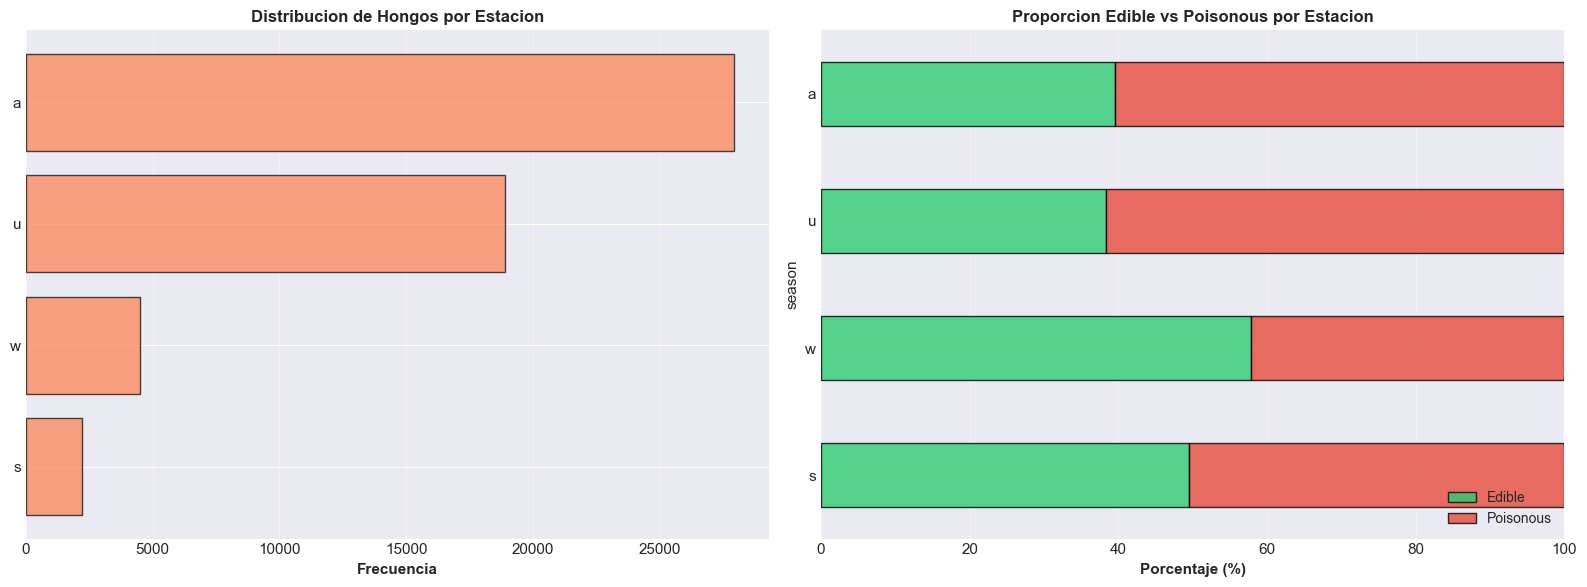

In [31]:
# Visualizacion de estacion
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Grafico 1: Conteos totales por estacion
season_totals = df['season'].value_counts().sort_values(ascending=True)
axes[0].barh(range(len(season_totals)), season_totals.values, 
             color='coral', alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(season_totals)))
axes[0].set_yticklabels(season_totals.index)
axes[0].set_xlabel('Frecuencia', fontsize=11, fontweight='bold')
axes[0].set_title('Distribucion de Hongos por Estacion', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3, axis='x')

# Grafico 2: Proporcion de clases por estacion
season_class_pct_sorted = season_class_pct.loc[season_totals.index]
season_class_pct_sorted.plot(kind='barh', stacked=True, ax=axes[1],
                             color=[colors_box['e'], colors_box['p']],
                             alpha=0.8, edgecolor='black')
axes[1].set_xlabel('Porcentaje (%)', fontsize=11, fontweight='bold')
axes[1].set_title('Proporcion Edible vs Poisonous por Estacion', fontsize=12, fontweight='bold')
axes[1].legend(['Edible', 'Poisonous'], loc='lower right', fontsize=10)
axes[1].set_xlim(0, 100)
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

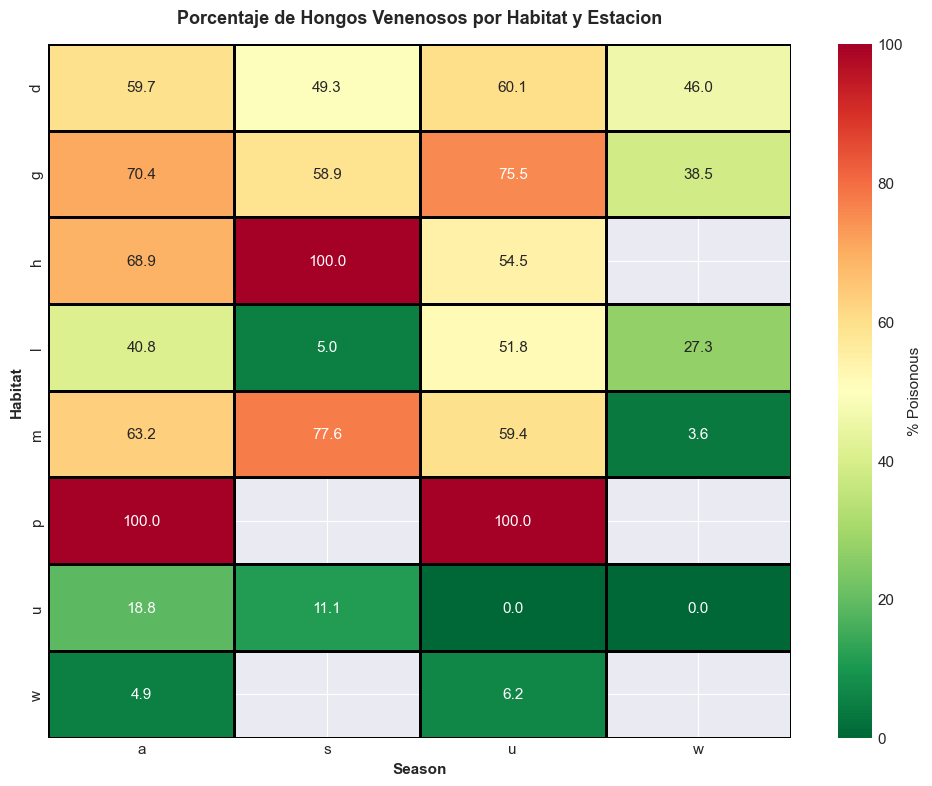

In [32]:
# Heatmap: Habitat x Season mostrando proporcion de venenosos
ct_habitat_season = pd.crosstab(df['habitat'], df['season'], values=df['class'].map({'e':0, 'p':1}), aggfunc='mean') * 100

plt.figure(figsize=(10, 8))
sns.heatmap(ct_habitat_season, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            cbar_kws={'label': '% Poisonous'}, linewidths=1, linecolor='black',
            vmin=0, vmax=100)
plt.title('Porcentaje de Hongos Venenosos por Habitat y Estacion', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('Season', fontsize=11, fontweight='bold')
plt.ylabel('Habitat', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

In [33]:
# Identificar combinaciones habitat-season mas peligrosas
ct_comb = pd.crosstab([df['habitat'], df['season']], df['class'], normalize='index') * 100
dangerous_combinations = ct_comb[ct_comb['p'] > 70].sort_values('p', ascending=False)

print("\n" + "="*70)
print("COMBINACIONES HABITAT-SEASON MAS PELIGROSAS (>70% venenosos)")
print("="*70)

if len(dangerous_combinations) > 0:
    for (habitat, season), row in dangerous_combinations.iterrows():
        count = len(df[(df['habitat'] == habitat) & (df['season'] == season)])
        print(f"  {habitat} + {season}: {row['p']:.1f}% venenosos (n={count})")
else:
    print("  No se encontraron combinaciones con mas del 70% de venenosos")


COMBINACIONES HABITAT-SEASON MAS PELIGROSAS (>70% venenosos)
  h + s: 100.0% venenosos (n=39)
  p + a: 100.0% venenosos (n=187)
  p + u: 100.0% venenosos (n=151)
  m + s: 77.6% venenosos (n=161)
  g + u: 75.5% venenosos (n=2821)
  g + a: 70.4% venenosos (n=3329)


## 8. Conclusiones del Analisis Visual

Resumen de los principales insights identificados a traves de las visualizaciones.

In [34]:
# Resumen ejecutivo de hallazgos
print("="*70)
print("RESUMEN EJECUTIVO: INSIGHTS PRINCIPALES")
print("="*70)

print("\n1. BALANCE DE CLASES:")
print("   -", f"Dataset con {len(df):,} observaciones")
print("   -", f"Edible: {class_percentages['e']:.1f}%, Poisonous: {class_percentages['p']:.1f}%")
balance_ratio = class_counts.max() / class_counts.min()
print("   -", f"Ratio de balance: {balance_ratio:.2f}:1")

print("\n2. DIFERENCIAS MORFOLOGICAS:")
for var in numerical_vars:
    edible_mean = df[df['class'] == 'e'][var].mean()
    poisonous_mean = df[df['class'] == 'p'][var].mean()
    diff_pct = abs((poisonous_mean - edible_mean) / edible_mean) * 100
    print(f"   - {var}: {diff_pct:.1f}% diferencia entre clases")

print("\n3. VARIABLES MAS PREDICTIVAS (Top 5 correlaciones):")
for idx, (var, corr) in enumerate(class_correlations.head(5).items(), 1):
    var_clean = var.replace('_encoded', '')
    print(f"   {idx}. {var_clean}: r = {corr:.3f}")

print("\n4. PATRONES POR HABITAT:")
most_dangerous_habitat = habitat_class_pct['p'].idxmax()
safest_habitat = habitat_class_pct['p'].idxmin()
print(f"   - Habitat mas peligroso: {most_dangerous_habitat} ({habitat_class_pct.loc[most_dangerous_habitat, 'p']:.1f}% venenosos)")
print(f"   - Habitat mas seguro: {safest_habitat} ({habitat_class_pct.loc[safest_habitat, 'p']:.1f}% venenosos)")

print("\n5. PATRONES POR ESTACION:")
most_dangerous_season = season_class_pct['p'].idxmax()
safest_season = season_class_pct['p'].idxmin()
print(f"   - Estacion mas peligrosa: {most_dangerous_season} ({season_class_pct.loc[most_dangerous_season, 'p']:.1f}% venenosos)")
print(f"   - Estacion mas segura: {safest_season} ({season_class_pct.loc[safest_season, 'p']:.1f}% venenosos)")

print("\n6. MULTICOLINEALIDAD:")
if high_corr_pairs:
    print(f"   - Se detectaron {len(high_corr_pairs)} pares de variables con alta correlacion (|r| > 0.7)")
    print(f"   - Par mas correlacionado: {high_corr_pairs[0][0]} <-> {high_corr_pairs[0][1]} (r = {high_corr_pairs[0][2]:.3f})")
else:
    print("   - No se detectaron problemas graves de multicolinealidad")

print("\n" + "="*70)

RESUMEN EJECUTIVO: INSIGHTS PRINCIPALES

1. BALANCE DE CLASES:
   - Dataset con 53,541 observaciones
   - Edible: 41.1%, Poisonous: 58.9%
   - Ratio de balance: 1.43:1

2. DIFERENCIAS MORFOLOGICAS:
   - cap-diameter: 16.0% diferencia entre clases
   - stem-height: 4.1% diferencia entre clases
   - stem-width: 18.9% diferencia entre clases

3. VARIABLES MAS PREDICTIVAS (Top 5 correlaciones):
   1. stem-surface: r = 0.265
   2. cap-diameter: r = -0.148
   3. stem-width: r = -0.146
   4. stem-color: r = -0.136
   5. cap-shape: r = -0.093

4. PATRONES POR HABITAT:
   - Habitat mas peligroso: p (100.0% venenosos)
   - Habitat mas seguro: w (5.6% venenosos)

5. PATRONES POR ESTACION:
   - Estacion mas peligrosa: u (61.7% venenosos)
   - Estacion mas segura: w (42.1% venenosos)

6. MULTICOLINEALIDAD:
   - Se detectaron 1 pares de variables con alta correlacion (|r| > 0.7)
   - Par mas correlacionado: cap-diameter <-> stem-width (r = 0.747)



## Conclusiones Finales

### Principales Hallazgos:

**Caracteristicas Morfologicas:**
- Se observaron diferencias estadisticamente significativas en las variables numericas entre hongos comestibles y venenosos
- Las mediciones de cap-diameter, stem-height y stem-width muestran patrones distintivos por clase
- Los box plots y violin plots revelaron diferencias en las distribuciones que pueden ser utiles para clasificacion

**Variables Categoricas Discriminativas:**
- Ciertas combinaciones de cap-shape, cap-color, y gill-color estan fuertemente asociadas con toxicidad
- El ring-type y gill-attachment muestran patrones claros de asociacion con la variable objetivo
- Algunas categorias tienen mas del 70-80% de hongos venenosos, lo que las convierte en indicadores de alto riesgo

**Factores Ambientales:**
- El habitat donde crece el hongo influye significativamente en la probabilidad de toxicidad
- La estacion del año tambien muestra variacion en la proporcion de hongos venenosos
- Ciertas combinaciones habitat-estacion son particularmente peligrosas

**Correlaciones y Relaciones:**
- Se identificaron las variables con mayor poder predictivo basado en correlaciones
- El analisis multivariado revelo interacciones entre variables que pueden mejorar la clasificacion
- Algunas variables presentan multicolinealidad que debera considerarse en modelos de machine learning

### Recomendaciones para Modelado:

1. **Feature Engineering**: Considerar crear variables de interaccion entre habitat-season y cap-shape-cap-color
2. **Feature Selection**: Priorizar las variables con mayor correlacion con la variable objetivo
3. **Tratamiento de Multicolinealidad**: Evaluar PCA o seleccion de features si la multicolinealidad es problematica
4. **Codificacion**: Usar one-hot encoding para variables categoricas con pocas categorias, target encoding para las que tienen muchas
5. **Algoritmos**: Random Forest, Gradient Boosting y SVM podrian ser buenos candidatos dado el tipo de datos

### Limitaciones:

- El dataset es hipotetico (generado a partir de primary_data.csv)
- Las codificaciones de letras requieren interpretacion cuidadosa
- La generalizacion a especies reales debe hacerse con precaucion

---

**Analisis completado exitosamente.**